#### GROUP NUMBER: 47

GROUP MEMBERS that participated in the production of this file: Yixiao Zhao; Junyi Ma; Xinyi Liu; Xiao Li

Comments: Too Hard !!!! Can you teach us in class? Or go through these problems in class. Thank you.

# HOMEWORK 3



This problem set has two parts.  These are the basics of the course and consist of simple data analysis and statistics questions. 

You should at least be familiar with all of the concepts in this problem set, even if you don’t have all of the answers.
 

### 1. 

 - Using the file "https://www.dropbox.com/s/4p74ya84niak743/Homework2.xlsx?dl=1", Regress the returns of the first ten stocks in the spreadsheet (CTL through WFT) on the value weighted market index (a cap-weighted index of all NYSE, AMEX, and Nasdaq stocks) return, and report intercepts and slope coefficients in a table.


Hint: 

 - use "import scipy.stats as stats and use stats.linregress 
(https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.linregress.html#scipy.stats.linregress)

- and call:(where x is the market, and y are each ten stocks

       slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

       Noting that R-sqrd=r_value^2 
       
- use a foor loop to loop through the ten stocks       


1.	Interpret the slope coefficients of this model.   

2.	What does the R2 of the regressions tell you?  What does it mean when the R2 is low in this case?

3.	Interpret the intercepts of the model, in terms of the effect of the market return on the securities’ returns.

 ### Answer here:


### Answer here:

In [277]:
import pandas as pd
import numpy as np
from scipy import stats as stats
%matplotlib inline
import matplotlib.pyplot as plt

data_url="https://www.dropbox.com/s/4p74ya84niak743/Homework2.xlsx?dl=1"
df = pd.read_excel(data_url, index_col=0, parse_dates = True, )
df = df/100
df.index 
df.index=pd.to_datetime(df.index,format = '%Y%m',errors='ignore')

In [278]:
dataframe = []
for i in range (0,10):
    slope, intercept, r_value, p_value, std_err = stats.linregress(df['Market'],df[df.columns[i]])
    #print(df.columns[i]);print(slope);print(intercept);print(r_value**2);print(p_value);print(std_err);
    dataframe.append({"slope":np.array(slope), "intercept":np.array(intercept),"r_value":np.array(r_value**2),"p_value":np.array(p_value),
                      "std_err":np.array(std_err)})
colIndex = df.columns[0:10]
colIndex
pd.DataFrame(dataframe,index = [colIndex])


intercept                 p_value              r_value  \
CTL    0.0018848074772488065   7.617652537351275e-09  0.17137943688347335   
T      0.0016262166086322997   9.216266878587247e-07  0.12688394536494677   
CSCO  -0.0047442151313889175   5.285950639272541e-24   0.4373607273487725   
FCX     0.007964452283066345   5.965476974600342e-16  0.30836036156105884   
XL     0.0009379245359070866   5.864652772196099e-14   0.2722608081046609   
IVZ     0.001916740825637725   7.257349451355153e-42   0.6448128584570718   
AMT     0.011602509202664486  1.0880008537737405e-06   0.1253110495092121   
WHR     0.007449317472791829    9.49001836157002e-18  0.33945839168362696   
IR     0.0052555500874011405   8.238196353148653e-24   0.4345684069100994   
WFT    0.0033472955565092555    6.34028904165645e-16   0.3078923615341317   

                   slope              std_err  
CTL   0.7269458561322905  0.11980930851901588  
T     0.5291530149044708  0.10404085765455791  
CSCO  1.5307792297738965  0.13013607072193462  
FCX   1.5698935220272732  0.17622635587167243  
XL    1.4386813444890967  0.17629903228100846  
IVZ    2.036247066002697  0.11327452332557729  
AMT   1.3524778583433583  0.26782573120636666  
WHR   1.4422376923372295   0.1507938590028585  
IR    1.4611503846720144  0.12492399836296784  
WFT   1.5135992330068488   0.1700937130597621

In [279]:
#Slope interpretation:
#For every unit change in market return, return of CSCO stock will change “slope”
#Intercept interpretation:
#If market return is 0, the stock’s return should be “intercept”
#R-squared:
#It tells how many points fall on the regression line.
#If R-squared is low in this case, it means that the stock does not follow the market's movement

### 2. 

a)	For CSCO and the market, calculate volatility (return standard deviation) using two different methods. 

1. First method: for each date, calculate volatility using all the past data up to that date.  

2. Second method: use only one year of past data. 

For both CSCO and the market, plot the two volatility estimates on the same chart. 

Why does the estimate using only the most recent year of data move around more than the estimate using all data?  Give two reasons why this might be the case.

Hint: you can use a for loop starting when there is only one year of data (2001) and loop through the months unitl the end of the sample. For method 1 you compute the stndard deviaiton using all obserrvation unitl the relvant month, while in mehtod 2 will use only the last 12 months worht of data

You can also use the method .rolling

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rolling.html


 ### Answer here:

In [280]:
df.shape[0]

180

In [281]:
import numpy as np
CSCO = pd.DataFrame(np.zeros((180, 2)),columns=['By_Date','By_Year'],index=df.index)
for i in range (0,df.shape[0]):
    CSCO.iloc[i,0]= df.CSCO[:i].std()
CSCO.By_Year = df.CSCO.rolling(12).std()[11:]
CSCO.head(15)

By_Date   By_Year
date                          
2000-01-01       NaN       NaN
2000-02-01       NaN       NaN
2000-03-01  0.130830       NaN
2000-04-01  0.097820       NaN
2000-05-01  0.142617       NaN
2000-06-01  0.167404       NaN
2000-07-01  0.154463       NaN
2000-08-01  0.141050       NaN
2000-09-01  0.130646       NaN
2000-10-01  0.144954       NaN
2000-11-01  0.137187       NaN
2000-12-01  0.135128  0.141098
2001-01-01  0.141098  0.140519
2001-02-01  0.135094  0.152672
2001-03-01  0.159783  0.149824

In [282]:
CSCO.plot()

In [283]:
import numpy as np
Market = pd.DataFrame(np.zeros((180, 2)),columns=['By_Date','By_Year'],index=df.index)
for i in range (0,df.shape[0]):
    Market.iloc[i,0]= df.Market[:i].std()
Market.By_Year = df.Market.rolling(12).std()[11:]
Market.head(15)

By_Date   By_Year
date                          
2000-01-01       NaN       NaN
2000-02-01       NaN       NaN
2000-03-01  0.050480       NaN
2000-04-01  0.048714       NaN
2000-05-01  0.054580       NaN
2000-06-01  0.049849       NaN
2000-07-01  0.051299       NaN
2000-08-01  0.047295       NaN
2000-09-01  0.051691       NaN
2000-10-01  0.052095       NaN
2000-11-01  0.049750       NaN
2000-12-01  0.056075  0.054233
2001-01-01  0.054233  0.054912
2001-02-01  0.053607  0.060353
2001-03-01  0.057345  0.058558

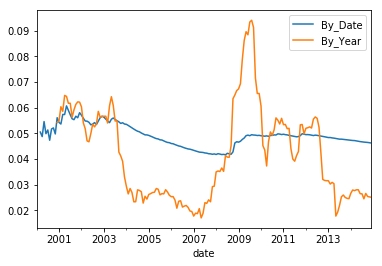

In [284]:
Market.plot()

In [285]:
# Why does the estimate using only the most recent year of data move around more than the estimate using all data? #
# Sample size of the year is smaller than the Date.#
# different business environment & company situation #

### 3.

Run a market model regression with CSCO in which you calculate OLS beta using the following two methods. 

- First method: For each date, calculate OLS beta using all the past data up to that date. 
- Second method: Use only one year of past data. 

Plot the two OLS beta estimates on the same chart along with a 95% confidence interval for each. 

Comparing the one-year estimates versus those using the full sample, does the chart indicate that betas move through time? Or, is there another explanation consistent with this picture?


hint: instead of using the lingress method (and for loop), I think it is easier to construct the covariance and the variance using each method and then construct the beta as seen in class

$$COV(R_{CSCO},R_{MKT})/VAR(R_{MKT})$$

 ### Answer here:

In [286]:
print(df.Market.cov(df.CSCO)/df.Market.var())

1.53077922977


In [290]:
import numpy as np
CSCO_Beta_OLS = pd.DataFrame(np.zeros((169, 2)),columns=['By_Date','By_Year'],index=df.index[11:])
CSCO_Std = pd.DataFrame(np.zeros((169, 2)),columns=['By_Date','By_Year'],index=df.index[11:])
for i in range (11,180):
    CSCO_Beta_OLS.iloc[i-11,0],a,b,c,CSCO_Std.iloc[i-11,0]=stats.linregress(df.Market[:i],df.CSCO[:i]);
    CSCO_Beta_OLS.iloc[i-11,1],a,b,c,CSCO_Std.iloc[i-11,1]=stats.linregress(df.Market[i-11:i],df.CSCO[i-11:i]);

CSCO_Beta_OLS.head()

By_Date   By_Year
date                          
2000-12-01  1.869363  1.869363
2001-01-01  1.638929  1.738445
2001-02-01  1.533952  1.441356
2001-03-01  1.951923  1.607896
2001-04-01  2.159897  1.887248

In [293]:
CSCO_Beta_OLS['Date_Lower95%'] = CSCO_Beta_OLS['By_Date'] - 1.96 * CSCO_Std['By_Date']
CSCO_Beta_OLS['Date_Upper95%'] = CSCO_Beta_OLS['By_Date'] + 1.96 * CSCO_Std['By_Date'] 
CSCO_Beta_OLS['Year_Lower95%'] = CSCO_Beta_OLS['By_Year'] - 1.96 * CSCO_Std['By_Year'] 
CSCO_Beta_OLS['Year_Upper95%'] = CSCO_Beta_OLS['By_Year'] + 1.96 * CSCO_Std['By_Year'] 
CSCO_Beta_OLS.head()

By_Date   By_Year  Date_Lower95%  Date_Upper95%  Year_Lower95%  \
date                                                                          
2000-12-01  1.869363  1.869363       0.875834       2.862891       0.875834   
2001-01-01  1.638929  1.738445       0.386556       2.891302       0.445165   
2001-02-01  1.533952  1.441356       0.352363       2.715540       0.323108   
2001-03-01  1.951923  1.607896       0.826875       3.076970       0.493943   
2001-04-01  2.159897  1.887248       1.039675       3.280119       0.710551   

            Year_Upper95%  
date                       
2000-12-01       2.862891  
2001-01-01       3.031725  
2001-02-01       2.559603  
2001-03-01       2.721850  
2001-04-01       3.063945

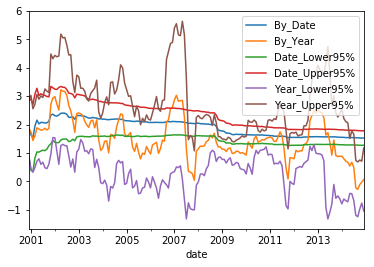

In [294]:
CSCO_Beta_OLS.plot()

In [ ]:
#  Comparing the one-year estimates versus those using the full sample, 
# does the chart indicate that betas move through time? Or, is there another explanation consistent with this picture? #

# Yes, although it is not obvious, the trends are roughly the same. There is a slightly downward trend in this graph. #